In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from yaml import load, Loader, Dumper

from face_geometry import get_metric_landmarks, PCF

In [2]:
with open("calibration_matrix.yaml", "r") as f:
    data = load(f, Loader=Loader)
    
print(data.keys())
fy = np.array(data['camera_matrix'])[1,1]
rvecs = np.array(data['rvecs'])
tvecs = np.array(data['tvecs'])

dict_keys(['camera_matrix', 'dist_coeff', 'rvecs', 'tvecs'])


In [3]:
print(rvecs.shape)
print(tvecs.shape)

(10, 3, 1)
(10, 3, 1)


In [4]:
frame_height, frame_width, channels = (720, 1280, 3)

In [5]:
landmarks = np.load('landmarks.npy')
pcf = PCF(near=1,far=10000,frame_height=frame_height,frame_width=frame_width,fy=fy)
metric_landmarks = get_metric_landmarks(landmarks.copy(), pcf)

(0.0, 720.0)

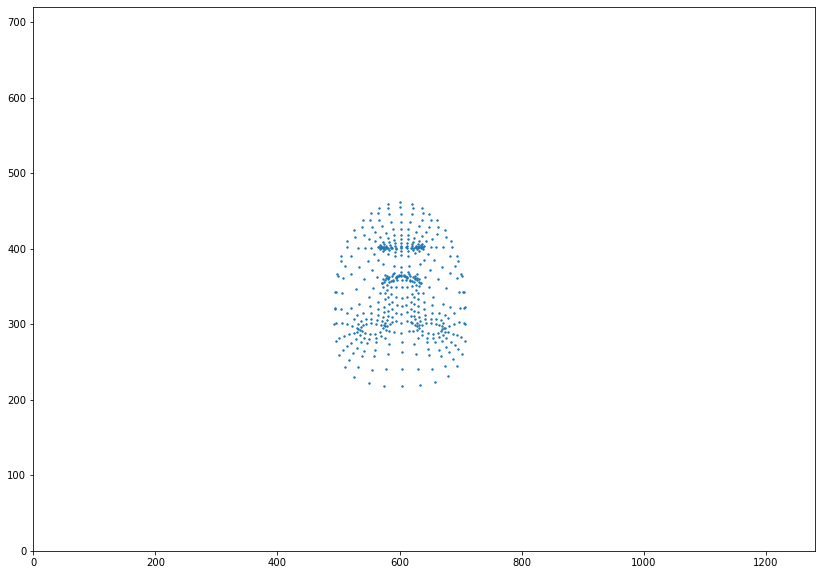

In [6]:
fig, ax = plt.subplots(1, figsize=(14, 10))
ax.scatter(frame_width*landmarks[0,:], frame_height*landmarks[1,:], s=2)

ax.set_xlim(0, frame_width)
ax.set_ylim(0, frame_height)

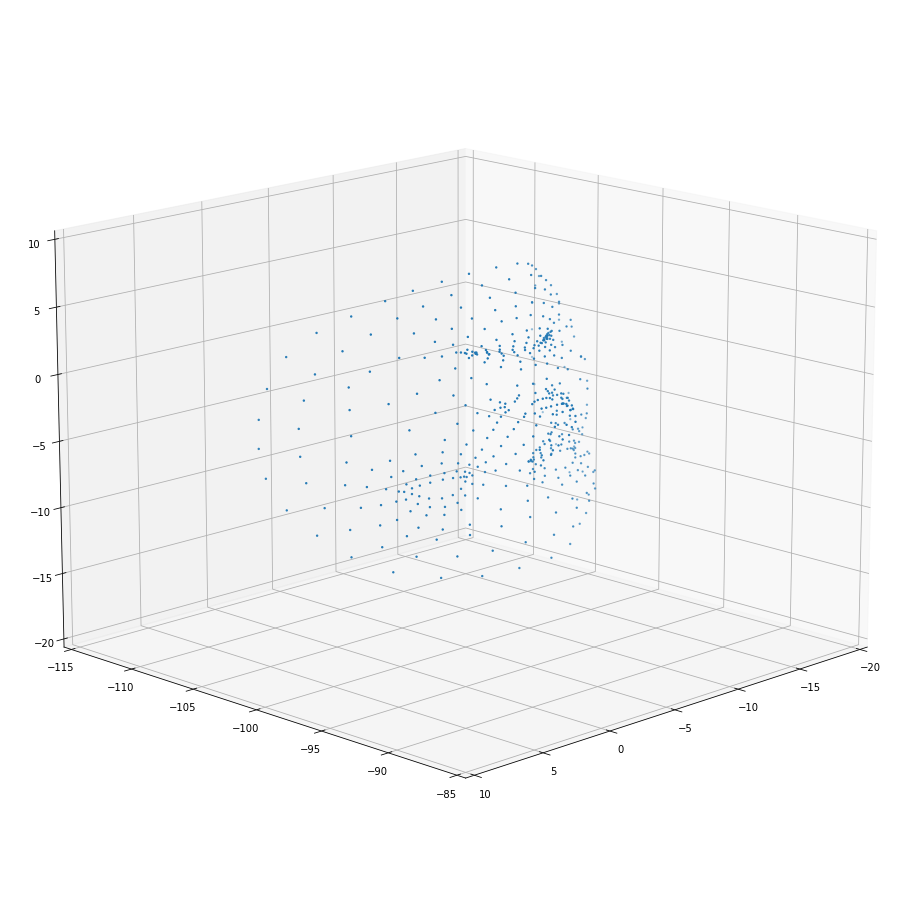

In [7]:
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(metric_landmarks[0,:], metric_landmarks[2,:], metric_landmarks[1,:], s=2)

ax.set_xlim(-20, 10)
ax.set_ylim(-115, -85)
ax.set_zlim(-20, 10)

ax.view_init(elev=15., azim=45.)